<a href="https://colab.research.google.com/github/MukeshMishraReloaded/projects/blob/main/Jamboree_Admission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Jamboree student admissions:

https://colab.research.google.com/drive/19TpkORzwiJyKQqinLy2JryNnpQIZwCTv#scrollTo=5z0qLpMLs8v2

#Column Profiling:

1) Serial No. (Unique row ID)

2) GRE Scores (out of 340)

3) TOEFL Scores (out of 120)

4) University Rating (out of 5)

5) Statement of Purpose/SOP strength (out of 5)

6) Letter of Recommendation/LOR strength (out of 5)

7) Undergraduate GPA (out of 10)

8) Research Experience (either 0 or 1)

9) Chance of Admit (ranging from 0 to 1)

#Concept Used:

#Exploratory Data Analysis

#Linear Regression

1. Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset.

2. Drop the unique row Identifier if you see any. This step is important as you don't want your model to build some understanding based on row numbers.

3. Use Non-graphical and graphical analysis for getting inferences about variables.

4. This can be done by checking the distribution of variables of graduate applicants.

5. Once you've ensured that students with varied merit apply for the university, you can start understanding the relationship between different factors responsible for graduate admissions.

6. Check correlation among independent variables and how they interact with each other.

7. Use Linear Regression from (Statsmodel library) and explain the results.

8. Test the assumptions of linear regression:
    - Multicollinearity check by VIF score
    - Mean of residuals
    - Linearity of variables (no pattern in residual plot)
    - Test for Homoscedasticity
    - Normality of residuals

9. Do model evaluation- MAE, RMSE, R2 score, Adjusted R2.

10. Provide actionable Insights & Recommendations

11. Try out different Linear Regressions

#Evaluation Criteria (100 Points):

#Define Problem Statement and perform Exploratory Data Analysis (10 points)

1. Definition of problem (as per given problem statement with additional views)

2. Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required) , missing value detection, statistical summary.

3. Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)

4. Bivariate Analysis (Relationships between important variables such as workday and count, season and count, weather and count.

5. Illustrate the insights based on EDA

6. Comments on range of attributes, outliers of various attributes

7. Comments on the distribution of the variables and relationship between them

8. Comments for each univariate and bivariate plots

#Data Preprocessing (10 Points)

1. Duplicate value check
2. Missing value treatment
3. Outlier treatment
4. Feature engineering
5. Data preparation for modeling

#Model building (10 Points)
1. Build the Linear Regression model and comment on the model statistics
2. Display model coefficients with column names
3. Try out Ridge and Lasso regression

#Testing the assumptions of the linear regression model (50 Points)

1. Multicollinearity check by VIF score (variables are dropped one-by-one till none has VIF>5) (10 Points)
2. The mean of residuals is nearly zero (10 Points)
3. Linearity of variables (no pattern in the residual plot) (10 Points)
4. Test for Homoscedasticity (10 Points)
5. Normality of residuals (almost bell-shaped curve in residuals distribution, points in QQ plot are almost all on the line) (10 Points)

#Model performance evaluation (10 Points)
17. Metrics checked - MAE, RMSE, R2, Adj R2
18. Train and test performances are checked
19. Comments on the performance measures and if there is any need to improve the model or not

#Actionable Insights & Recommendations (10 Points)

1. Comments on significance of predictor variables
2. Comments on additional data sources for model improvement, model
implementation in real world, potential business benefits from improving the model (These are key to differentiating a good and an excellent solution)


In [671]:
# Loading dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [672]:
df=pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv")

In [673]:
#Check the first few rows
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [674]:
#Check for null values
df.isna().sum().any()

False

In [675]:
#Check for duplicates
df.duplicated().sum()

0

In [676]:
#Check the shape of dataframe
df.shape

(500, 9)

In [677]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

# Data Structure:

The dataset contains 500 entries with 9 columns including -
GRE Score, TOEFL Score, University Rating, SOP(Statement of Purpose), LOR (Letter of Recommendation), CGPA, Research, and Chance of Admit as the target variable.

There are no missing values in the dataset.

# Problem Statement
Predict the chance of admission (Chance of Admit) of a candidate based on the following -

1) GRE Score

2) TOEFL Score

3) University Rating

4) Statement of Purpose

5) Letter of Recommendation Strength

6) Undergraduate GPA

7) Research Experience.


In [678]:
#Remove leading and trailing white spaces in column names
df.columns=df.columns.str.strip()
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [679]:
df_filtered=df.copy()

In [680]:
df_filtered.drop(['Serial No.'], axis=1, inplace=True)
df_filtered.head(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76


In [748]:
print(f"Possible values for SOP: {df_filtered['SOP'].nunique()}")
print(f"Possible values for LOR: {df_filtered['LOR'].nunique()}")
print(f"Possible values for Research: {df_filtered['Research'].nunique()}")
print(f"Possible values for University Rating: {df_filtered['University Rating'].nunique()}")

Possible values for SOP: 9
Possible values for LOR: 9
Possible values for Research: 2
Possible values for University Rating: 5


In [749]:
# Conclusion: These are possible candidates for conversion to categorical variables.

In [682]:
#Save a copy of the dataset
df_1 = df_filtered.copy()

In [683]:
#Converting Research, SOP, LOR and Uni. Rating as categorical values
df_filtered['Research'] = df_filtered['Research'].astype('category')
df_filtered['SOP'] = df_filtered['SOP'].astype('category')
df_filtered['LOR'] = df_filtered['LOR'].astype('category')
df_filtered['University Rating']=df_filtered['University Rating'].astype('category')
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   GRE Score          500 non-null    int64   
 1   TOEFL Score        500 non-null    int64   
 2   University Rating  500 non-null    category
 3   SOP                500 non-null    category
 4   LOR                500 non-null    category
 5   CGPA               500 non-null    float64 
 6   Research           500 non-null    category
 7   Chance of Admit    500 non-null    float64 
dtypes: category(4), float64(2), int64(2)
memory usage: 18.8 KB


In [684]:
df_filtered.dtypes

GRE Score               int64
TOEFL Score             int64
University Rating    category
SOP                  category
LOR                  category
CGPA                  float64
Research             category
Chance of Admit       float64
dtype: object

In [685]:
df_filtered.describe()

,GRE Score,TOEFL Score,CGPA,Chance of Admit
count,500.000000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,8.576440,0.72174
std,11.295148,6.081868,0.604813,0.14114
min,290.000000,92.000000,6.800000,0.34000
25%,308.000000,103.000000,8.127500,0.63000
50%,317.000000,107.000000,8.560000,0.72000
75%,325.000000,112.000000,9.040000,0.82000
max,340.000000,120.000000,9.920000,0.97000


Index(['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit'], dtype='object')


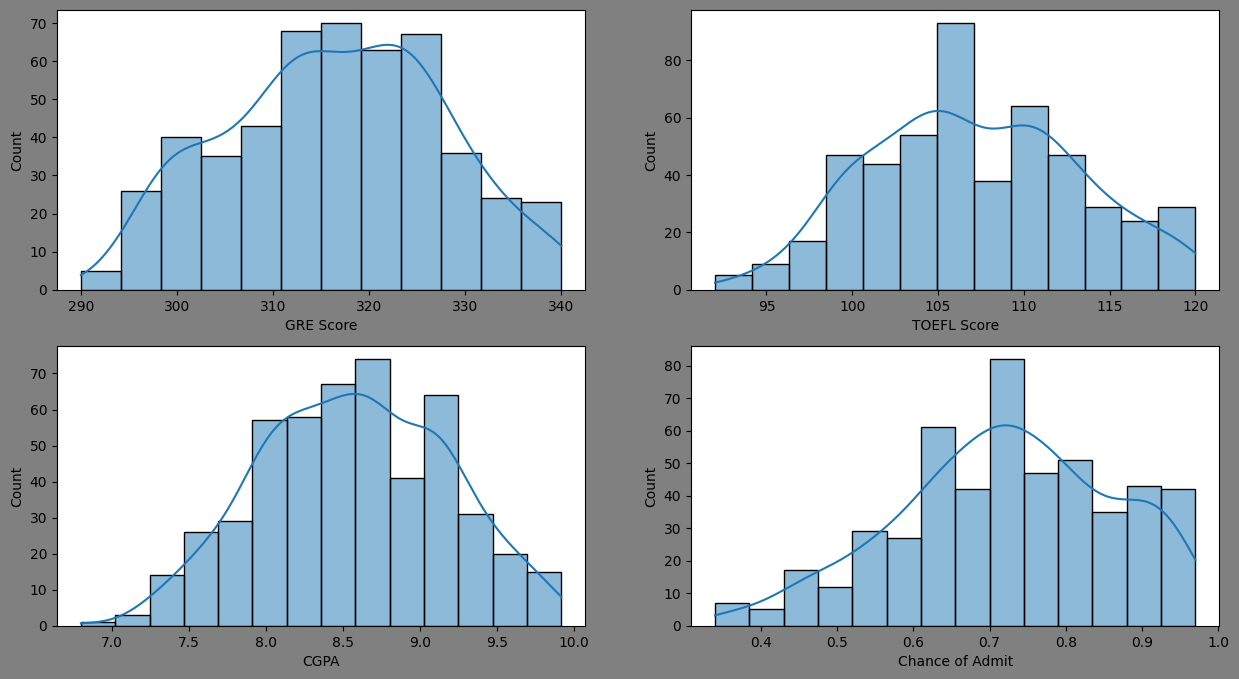

In [686]:
# Univariate Analysis - Distribution of continuous variables
num_cols = df_filtered.select_dtypes(include=['int64', 'float64']).columns
print(num_cols)
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
fig.set_facecolor(color = 'grey')
idx = 0
for row in range(2):
  for col in range(2):
    sns.histplot(data=df_filtered, x=num_cols[idx], ax=axis[row, col], kde=True)
    idx += 1
plt.show()

# Insights:

The histplots for numerical data columns tell us that the data is almost normally distributed for each of the numerical / continious variables, which is a good sign for Linear Regression analysis.

#Descriptive Statistics:

GRE Score: Ranges from 290 to 340, with a mean of approximately 316.47.

TOEFL Score: Ranges from 92 to 120, with a mean of approximately 107.19.

CGPA: Ranges from 6.8 to 9.92, with a mean of approximately 8.58.

Chance of Admit: Ranges from 0.34 to 0.97, with a mean of approximately 0.72.

Index(['University Rating', 'SOP', 'LOR', 'Research'], dtype='object')


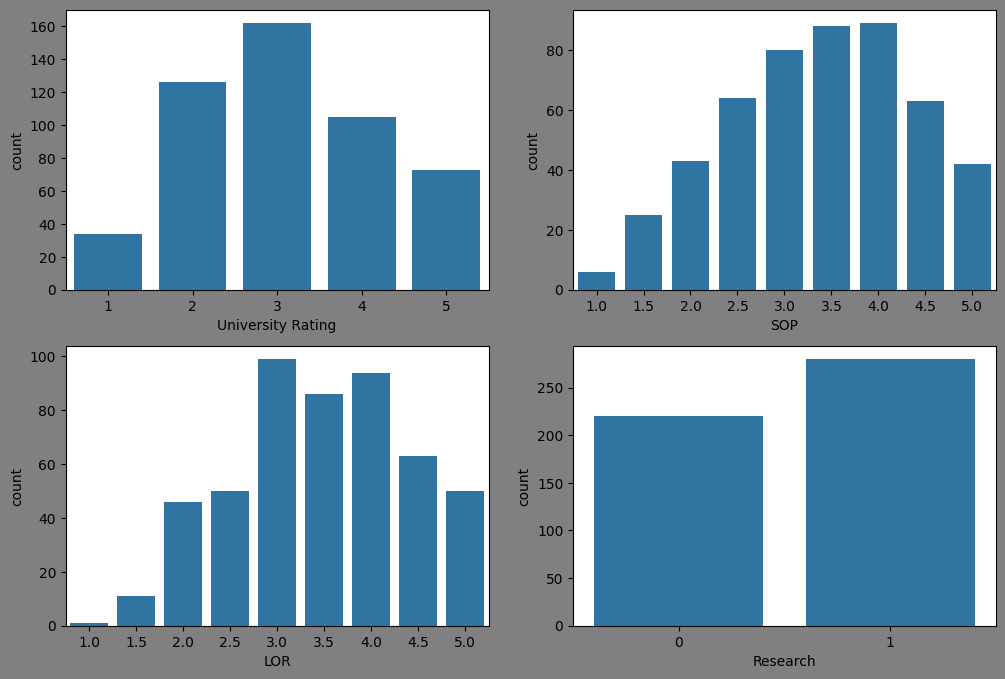

In [687]:
cat_cols = df_filtered.select_dtypes(include=['category', 'object']).columns
print(cat_cols)
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.set_facecolor(color = 'grey')
idx = 0
for row in range(2):
  for col in range(2):
    sns.countplot(data=df_filtered, x=cat_cols[idx], ax=axis[row, col])
    idx += 1
plt.show()

# Insights:

1) Most common university rating is 3.

2) Most common SOP strength score is 4.0.

3) Most common LOR strength score is 3.0.

4) There are more candidates who have 'Research' in their profile than not.

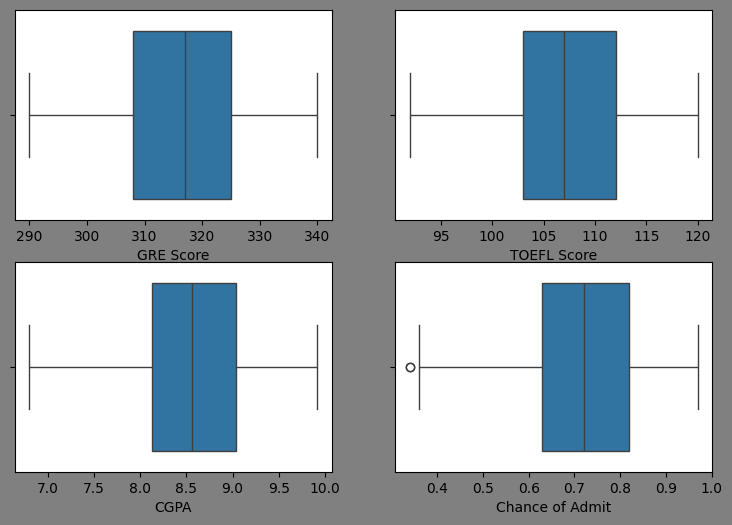

In [688]:
#Intial Outlier analysis: Univariate Analysis
#Box plot for each numerical column
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(9, 6))
fig.set_facecolor(color = 'grey')
idx = 0
for row in range(2):
  for col in range(2):
    sns.boxplot(data=df_filtered, x=num_cols[idx], ax=axis[row, col])
    idx += 1
plt.show()

(500, 8)
(500, 8)
(500, 8)


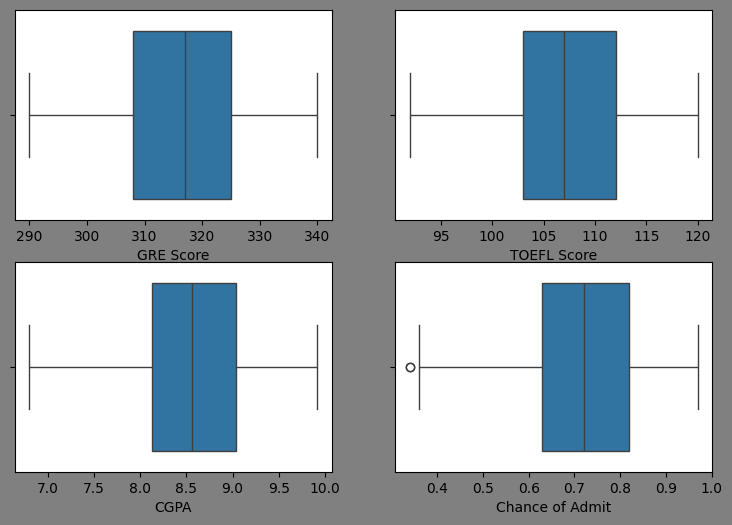

In [689]:
#Removing the outliers
ind_num_cols=['GRE Score', 'TOEFL Score', 'CGPA']
for col in ind_num_cols:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  # Filtering out the outliers
  df_filtered = df_filtered[(df_filtered[col] >= (Q1 - 1.5 * IQR)) & (df_filtered[col] <= (Q3 + 1.5 * IQR))]
  print(df_filtered.shape)
# Box plot for each numerical column
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(9, 6))
fig.set_facecolor(color = 'grey')
idx = 0
for row in range(2):
    for col in range(2):
        sns.boxplot(data=df_filtered, x=num_cols[idx], ax=axis[row, col])
        idx += 1
plt.show()

# Outliers:

There are no outliers in the independent numerical columns data viz. CGPA, GRE Score & TOEFL Score.

There are 2 outliers in the 'Chance of Admit', but that is the target variable.

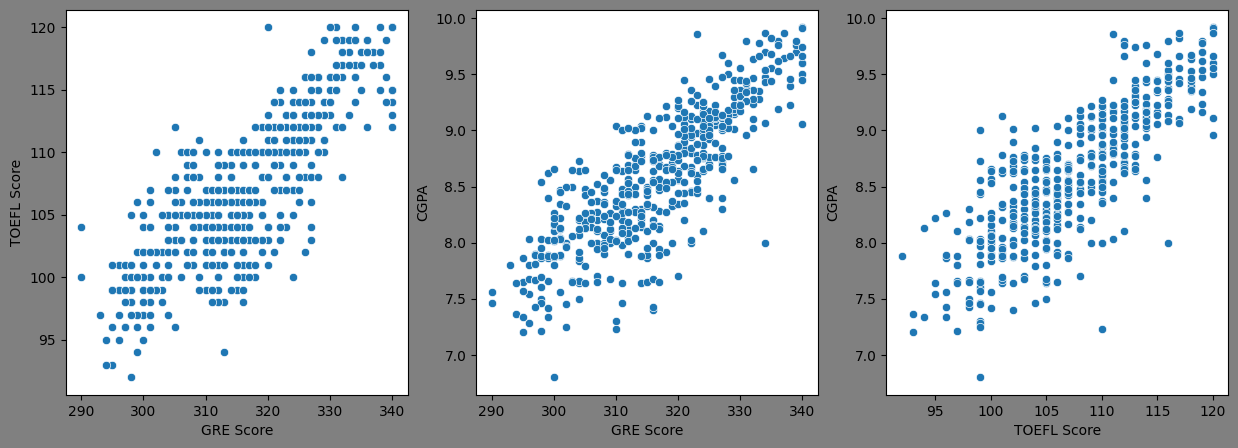

In [690]:
#Bivariate Analysis (Relationships between important variables).
# Bivariate Analysis - Scatter Plots for pairs of variables
# Example: GRE Score vs CGPA

ind_num_cols=['GRE Score', 'TOEFL Score', 'CGPA']
# Scatter plot for each numerical column
fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.set_facecolor(color = 'grey')
sns.scatterplot(data=df_filtered, x=ind_num_cols[0], y=ind_num_cols[1], ax=axis[0])
sns.scatterplot(data=df_filtered, x=ind_num_cols[0], y=ind_num_cols[2], ax=axis[1])
sns.scatterplot(data=df_filtered, x=ind_num_cols[1], y=ind_num_cols[2], ax=axis[2])
plt.show()

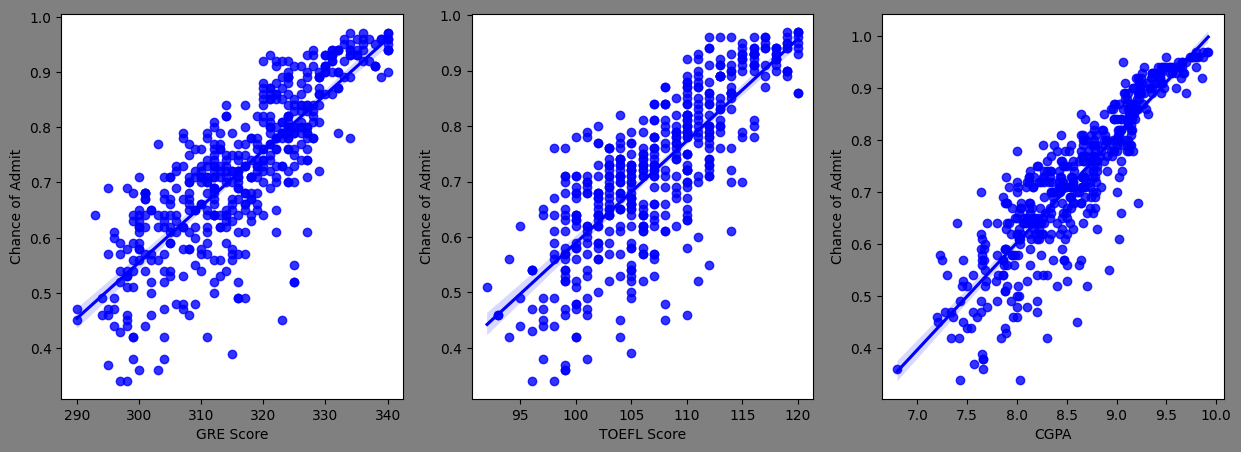

In [691]:
#Bivariate Analysis (Relationships between important variables).
# Bivariate Analysis - Regression Plots for pairs of variables
# Example: GRE Score vs Chance of Admit

ind_num_cols=['GRE Score', 'TOEFL Score', 'CGPA']
# Regplot for each numerical column
fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.set_facecolor(color = 'grey')
idx = 0
for row in range(3):
  sns.regplot(data=df_filtered, x=ind_num_cols[idx], y='Chance of Admit', color='b', ax=axis[row])
  idx += 1
plt.show()


# Insights from correlation analysis:

There is strong correlation between various numerical columns like CGPA, GRE Score, TOEFL Score and also between numerical columns and the target variable 'Chance of Admit'.



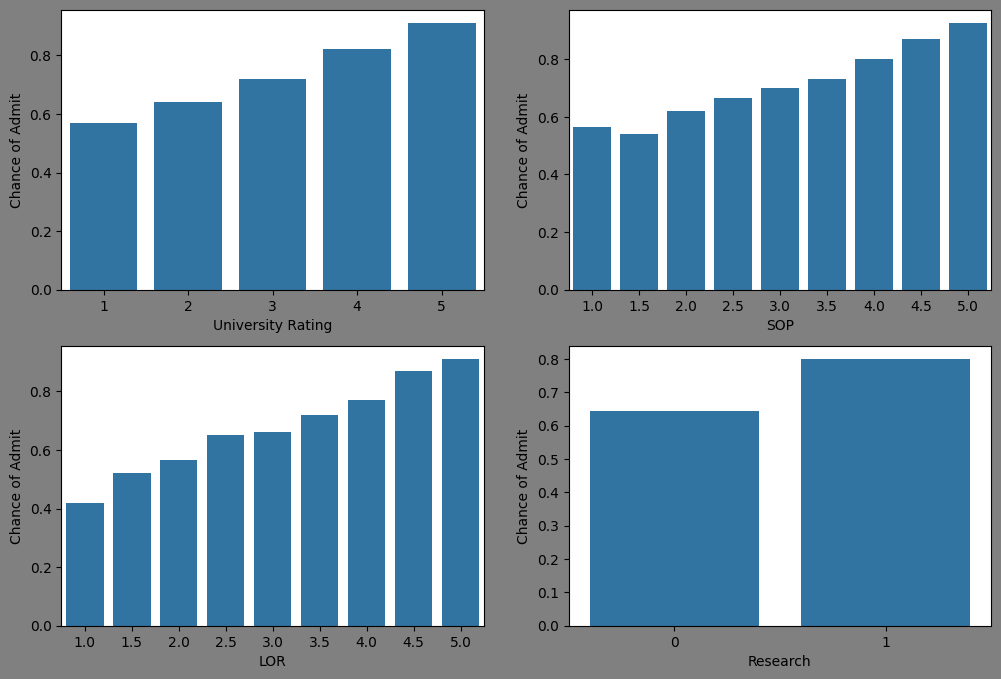

In [692]:
# Bar plot for each categorical column: Bivariate Analysis
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.set_facecolor(color = 'grey')
idx = 0
for row in range(2):
  for col in range(2):
      df_bar=df_filtered.groupby(cat_cols[idx])['Chance of Admit'].median().sort_values(ascending=False).reset_index()
      sns.barplot(data=df_bar, x=cat_cols[idx], y='Chance of Admit', ax=axis[row, col])
      idx += 1
plt.show()

# Insights:

As we can see from the bar plots, the median 'Chance of Admit' goes up with the increase in the strength of the categorical values like SOP, LOR, University Rating & Research.

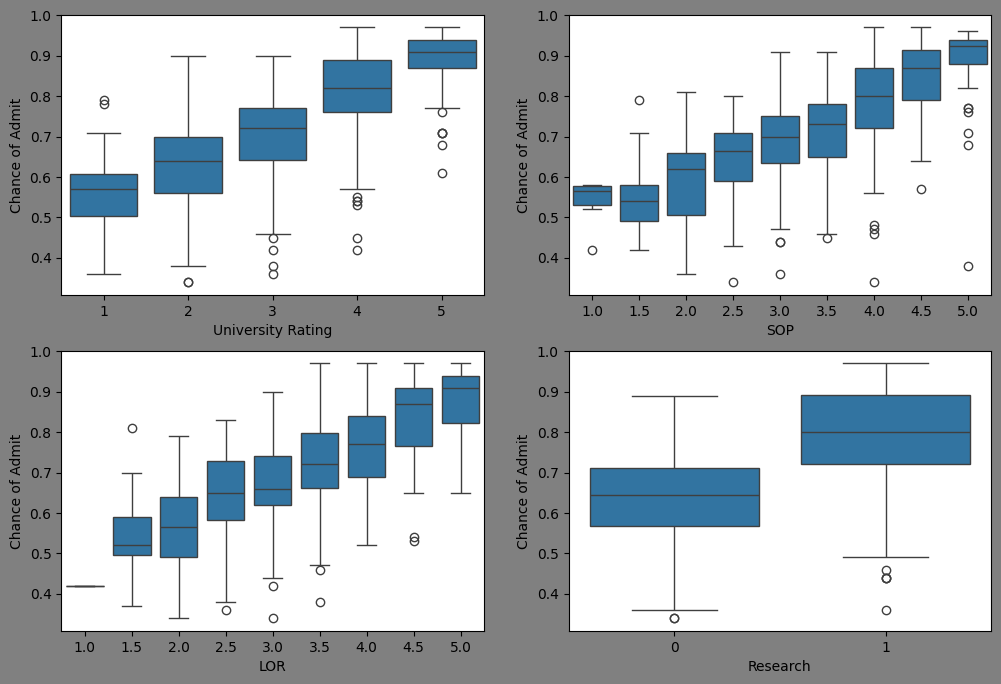

In [693]:
# Boxplot for 'Chance of Admit' against each categorical column
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.set_facecolor(color = 'grey')
idx = 0
for row in range(2):
  for col in range(2):
      sns.boxplot(data=df_filtered, x=cat_cols[idx], y='Chance of Admit', ax=axis[row, col])
      idx += 1
plt.show()

# Insights:

As we can see from the boxplots, the median 'Chance of Admit' goes up with the increase in the strength of the categorical values like SOP, LOR, University Rating & Research.

Exception: Median Chance of Admit for SOP 1.0 is greater than SOP 1.5.

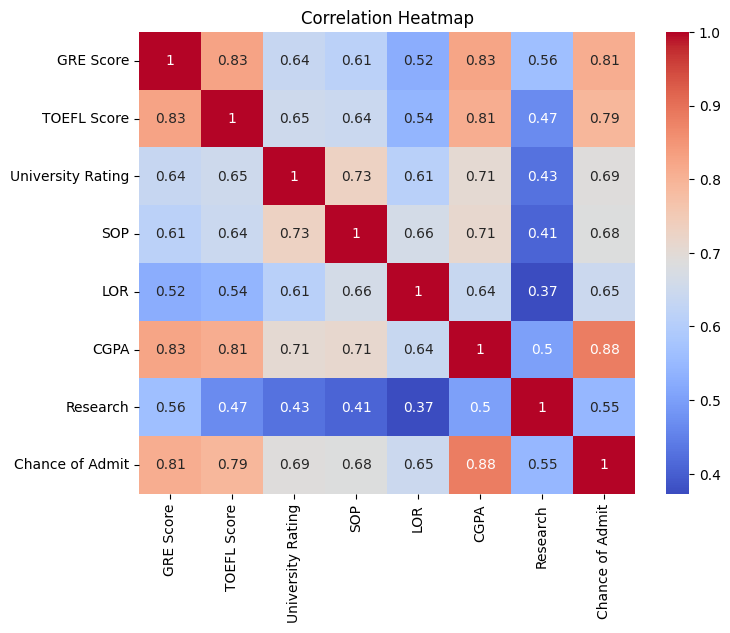

In [694]:
# Correlation Plot using Heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = df_1.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Insights:

1) There is strong correlation between GRE Score, TOEFL Score & CGPA.

2) There is strong correlation between 'Chance of Admit' and GRE Score, TOEFL Score and CGPA.

3) The strongest correlation is between CGPA and "Chance of Admit', so CGPA is the most important factor in deciding the admission of the candidate, followed by GRE score and TOEFL score.

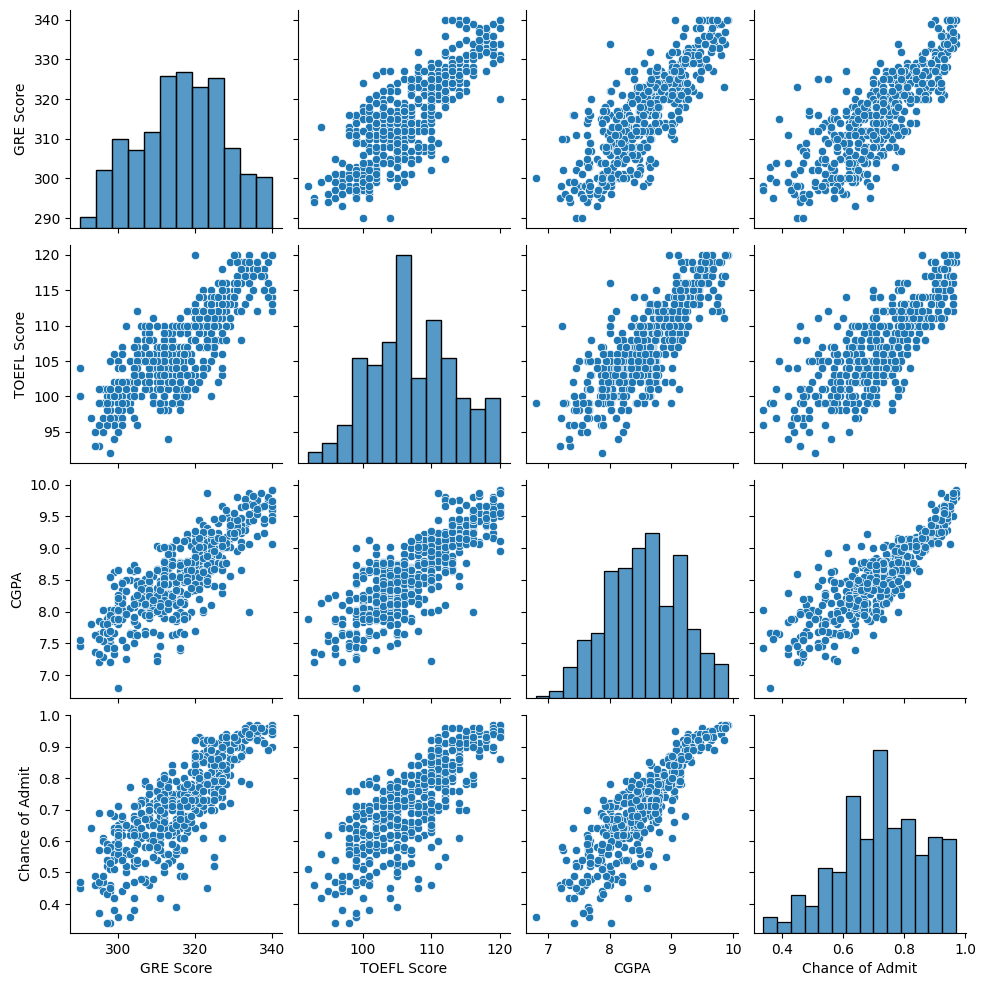

In [695]:
# Create a pair plot
sns.pairplot(df_filtered)
# Display the plot
plt.show()

In [696]:
#Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Drop the target variable

X = df_1.drop(['Chance of Admit'], axis=1)
print(df_1.shape)
y = df_1['Chance of Admit']

# Standardizing the features before applying PCA
X_scaled = StandardScaler().fit_transform(X)

# Applying PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

# The number of components PCA chose after fitting the data
print("Number of PCA components:", pca.n_components_)


(500, 8)
Number of PCA components: 5


# Dimensionality Reduction with PCA

Principal Component Analysis (PCA) is a technique used to emphasize variation and bring out strong patterns in a dataset. It's often used to make data easy to explore and visualize. PCA can also be used as a tool to reduce the dimensions of the data by transforming it into a new set of variables, the principal components, which are uncorrelated and ordered so that the first few retain most of the variation present in all of the original variables.

PCA creates new features (principal components) that are linear combinations of the original features. These components are orthogonal and capture the maximum variance present in the data, in order of importance. The fact that we have 5 components suggests that these 5 new features capture a significant portion (95%) of the variance in the dataset.

In [697]:
#Feature Selection
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

# We'll use LassoCV as it can select features given a regularization path
lasso = LassoCV(cv=5).fit(X_scaled, y)

# Model-based feature selection
model_feature_selection = SelectFromModel(lasso, prefit=True)
X_selected = model_feature_selection.transform(X_scaled)

# Display the features that were selected
selected_features = X.columns[model_feature_selection.get_support()]
print("Selected features:", selected_features)


Selected features: Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research'],
      dtype='object')


# Feature Selection:

The feature selection process has identified 7 original features that are most relevant to predicting the target variable. This does not create new features but selects a subset of existing ones based on their importance, which is determined by the model (LassoCV).

In [698]:
#Feature engineering

from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale numeric features
df_1[['GRE Score', 'TOEFL Score', 'CGPA']] = scaler.fit_transform(df_1[['GRE Score', 'TOEFL Score', 'CGPA']])

# Create new feature - Total Score
df_1['Total Score'] = df_1['GRE Score'] + df_1['TOEFL Score']

# Feature Interaction - Average Rating
df_1['Average Rating'] = (df_1['University Rating'] + df_1['SOP'] + df_1['LOR']) / 3

# Binning CGPA into categories
bins_discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
df_1['CGPA Binned'] = bins_discretizer.fit_transform(df_1[['CGPA']])

# Polynomial Features - Squared terms
poly_features = PolynomialFeatures(degree=2, include_bias=False)
squared_features = poly_features.fit_transform(df_1[['GRE Score', 'TOEFL Score']])
df_1['GRE Score Squared'] =   squared_features[:, 2] # Square of GRE Score
df_1['TOEFL Score Squared'] = squared_features[:, 4] # Square of TOEFL Score

#Label Encoding of all categorical variables
label_encoder = LabelEncoder()
cat_cols=["University Rating", "SOP", "LOR", "Research"]
for col in cat_cols:
  df_1[col] = label_encoder.fit_transform(df_1[col])
  val=df_1[col].value_counts()
  #print(val)

# Display the transformed dataset
df_1.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Total Score,Average Rating,CGPA Binned,GRE Score Squared,TOEFL Score Squared
0,1.819238,1.778865,3,7,7,1.776806,1,0.92,3.598103,4.333333,2.0,3.309626,3.164362
1,0.667148,-0.031601,3,6,7,0.485859,1,0.76,0.635547,4.166667,1.0,0.445087,0.000999
2,-0.041830,-0.525364,2,4,5,-0.954043,1,0.72,-0.567194,3.166667,1.0,0.001750,0.276008
3,0.489904,0.462163,2,5,3,0.154847,1,0.80,0.952066,3.000000,1.0,0.240006,0.213594
4,-0.219074,-0.689952,1,2,4,-0.606480,0,0.65,-0.909026,2.333333,1.0,0.047994,0.476034


# Feature engineering performed:

Based on this dataset, we can consider the above feature engineering techniques:

Normalization/Standardization: Scale numeric features like GRE Score, TOEFL Score, and CGPA using StandardScaler.

Feature Interaction: Create new features by combining existing features, like the total score (GRE + TOEFL) or an average rating (combining University Rating, SOP, and LOR).

Binning: Convert continuous variables into categorical bins. For example, CGPA can be binned into categories.

Encoding: Use label encoding method for encoding categorical variables.

Feature Selection: Identify and keep only the most relevant features for predicting the Chance of Admit.

Polynomial Features: Create polynomial features (like squares or cubes of existing features) to capture non-linear relationships.


In [699]:
#Print all the performance metrics for linear regression models
def get_metrics(y_true, y_pred, r, n, p, m):
    """Calculate and print MAE, RMSE, R2, and Adjusted R2."""
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    print(f'********* Regression Type: {r} *****')
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')
    print(f'R2: {r2}')
    print(f'Adjusted R2: {adjusted_r2}')

    print(f'Bias : {m.intercept_}')
    print(f'Coefficients : {m.coef_}')

    print(f'------------------------------------')
    print('                                     ')

In [700]:
#Generic train and test regression function
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

def train_and_test(df, regression_type='Linear', degree=2):
    """Train and test the specified regression model."""
    X = df.drop(['Chance of Admit'], axis=1)  # Assuming this as target
    y = df['Chance of Admit']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    if regression_type == 'Polynomial':
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)
        model = LinearRegression()
        model.fit(X_train_poly, y_train)
        y_pred_test = model.predict(X_test_poly)
        y_pred_train = model.predict(X_train_poly)
        p_train = X_train_poly.shape[1]
        p_test = X_test_poly.shape[1]
    else:
        if regression_type == 'Lasso':
            model = Lasso(alpha=0.001)
        elif regression_type == 'Ridge':
            model = Ridge(alpha=1.0)
        else:
            model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred_test = model.predict(X_test)
        y_pred_train = model.predict(X_train)
        p_train = X_train.shape[1]
        p_test = X_test.shape[1]

    n_test = len(y_test)
    n_train = len(y_train)
    print(f'Performace metrics for the train dataset: ')
    print(f'-------------------------------------------')
    get_metrics(y_train, y_pred_train, regression_type, n_train, p_train, model)
    print(f'Performace metrics for the test dataset: ')
    print(f'-------------------------------------------')
    get_metrics(y_test, y_pred_test, regression_type, n_test, p_test, model)


In [701]:
# Linear Regression performance metrics
train_and_test(df_1, regression_type='Linear')

Performace metrics for the train dataset: 
-------------------------------------------
********* Regression Type: Linear *****
MAE: 0.041998345589148424
RMSE: 0.059204925489417845
R2: 0.8221495090338196
Adjusted R2: 0.8166347651278915
Bias : 0.6478993468038284
Coefficients : [ 0.01169175  0.00350048  0.0022332   0.00044254  0.00819174  0.06386639
  0.02377136  0.01519224  0.00218345  0.00852034 -0.00236267 -0.00143787]
------------------------------------
                                     
Performace metrics for the test dataset: 
-------------------------------------------
********* Regression Type: Linear *****
MAE: 0.04214478950669589
RMSE: 0.06066513918450398
R2: 0.8200362292285946
Adjusted R2: 0.7952136401566767
Bias : 0.6478993468038284
Coefficients : [ 0.01169175  0.00350048  0.0022332   0.00044254  0.00819174  0.06386639
  0.02377136  0.01519224  0.00218345  0.00852034 -0.00236267 -0.00143787]
------------------------------------
                                     


In [702]:
# Lasso Regression performance metrics
train_and_test(df_1, regression_type='Lasso')

Performace metrics for the train dataset: 
-------------------------------------------
********* Regression Type: Lasso *****
MAE: 0.04231993905675342
RMSE: 0.05929728639604978
R2: 0.821594175326641
Adjusted R2: 0.816062211770878
Bias : 0.65851958235573
Coefficients : [ 0.00328419 -0.          0.00244452  0.00107641  0.0085589   0.06532046
  0.0199791   0.02212124  0.          0.0025005  -0.00254542 -0.00041624]
------------------------------------
                                     
Performace metrics for the test dataset: 
-------------------------------------------
********* Regression Type: Lasso *****
MAE: 0.04253615646801353
RMSE: 0.06106568838923108
R2: 0.8176519169461774
Adjusted R2: 0.7925004572146157
Bias : 0.65851958235573
Coefficients : [ 0.00328419 -0.          0.00244452  0.00107641  0.0085589   0.06532046
  0.0199791   0.02212124  0.          0.0025005  -0.00254542 -0.00041624]
------------------------------------
                                     


In [703]:
# Ridge Regression performance metrics
train_and_test(df_1, regression_type='Ridge')

Performace metrics for the train dataset: 
-------------------------------------------
********* Regression Type: Ridge *****
MAE: 0.04198083584132056
RMSE: 0.05920627136021253
R2: 0.8221414230004265
Adjusted R2: 0.8166264283647808
Bias : 0.6463136094469549
Coefficients : [ 0.01185672  0.00348803  0.00229946  0.00048955  0.00824387  0.06278151
  0.02343148  0.01534475  0.00222206  0.00932067 -0.00233116 -0.00143651]
------------------------------------
                                     
Performace metrics for the test dataset: 
-------------------------------------------
********* Regression Type: Ridge *****
MAE: 0.04213722991546172
RMSE: 0.060646799130326154
R2: 0.8201450247063996
Adjusted R2: 0.7953374419072823
Bias : 0.6463136094469549
Coefficients : [ 0.01185672  0.00348803  0.00229946  0.00048955  0.00824387  0.06278151
  0.02343148  0.01534475  0.00222206  0.00932067 -0.00233116 -0.00143651]
------------------------------------
                                     


In [704]:
# Ploynomial Regression performance metrics (degree=1)
train_and_test(df_1, regression_type='Polynomial', degree=1)

Performace metrics for the train dataset: 
-------------------------------------------
********* Regression Type: Polynomial *****
MAE: 0.04199834558914842
RMSE: 0.059204925489417845
R2: 0.8221495090338196
Adjusted R2: 0.8161597256593109
Bias : 0.6478993468038285
Coefficients : [ 0.          0.01169175  0.00350048  0.0022332   0.00044254  0.00819174
  0.06386639  0.02377136  0.01519224  0.00218345  0.00852034 -0.00236267
 -0.00143787]
------------------------------------
                                     
Performace metrics for the test dataset: 
-------------------------------------------
********* Regression Type: Polynomial *****
MAE: 0.042144789506695916
RMSE: 0.060665139184504
R2: 0.8200362292285945
Adjusted R2: 0.7928324034143123
Bias : 0.6478993468038285
Coefficients : [ 0.          0.01169175  0.00350048  0.0022332   0.00044254  0.00819174
  0.06386639  0.02377136  0.01519224  0.00218345  0.00852034 -0.00236267
 -0.00143787]
------------------------------------
             

In [705]:
#VALIDATING ASSUMPTIONS OF LINEAR REGRESSION:

In [711]:
#Multicollinearity check by VIF score (variables are dropped one-by-one till none has VIF>5)
X = df_1.drop(['Chance of Admit'], axis=1)  # Assuming this as target
y = df['Chance of Admit']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
y_train = np.array(y_train)

X_sm = sm.add_constant(X_train)  # Statmodels default is without intercept, to add intercept we need to add constant.

model = sm.OLS(y_train, X_sm)
results = model.fit()

# Print the summary statistics of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     193.3
Date:                Thu, 01 Feb 2024   Prob (F-statistic):          3.63e-144
Time:                        19:27:04   Log-Likelihood:                 577.15
No. Observations:                 400   AIC:                            -1132.
Df Residuals:                     389   BIC:                            -1088.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3309    

In [713]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print("R2 score: ",model.score(X_train, y_train))
pd.DataFrame(
    {
    'feature':["constant"]+list(X.columns),
    'coeff': (model.intercept_ + model.coef_[0])
    }
)

R2 score:  0.8324847178477062


,feature,coeff
0,constant,0.624492
1,GRE Score,0.624492
2,TOEFL Score,0.624492
3,University Rating,0.624492
4,SOP,0.624492
5,LOR,0.624492
6,CGPA,0.624492
7,Research,0.624492
8,Total Score,0.624492
9,Average Rating,0.624492


In [714]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X_t = pd.DataFrame(X_train, columns=X_train.columns)
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,GRE Score,inf
1,TOEFL Score,inf
7,Total Score,inf
8,Average Rating,496.29
4,LOR,69.52
3,SOP,58.93
2,University Rating,43.42
5,CGPA,8.34
9,CGPA Binned,5.05
10,GRE Score Squared,1.97


In [716]:
#Note : VIF values tends to be infinity when there is a perfect correlation between the variables

In [715]:
cols2 = vif["Features"][1:].values
X2 = pd.DataFrame(X_train, columns=X_train.columns)[cols2]

X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
sm_model = sm.OLS(list(y_train), X2_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     193.3
Date:                Thu, 01 Feb 2024   Prob (F-statistic):          3.63e-144
Time:                        19:30:37   Log-Likelihood:                 577.15
No. Observations:                 400   AIC:                            -1132.
Df Residuals:                     389   BIC:                            -1088.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3309    

In [718]:
vif_thr = 5
r2_thr = 0.85
i = 0
feats_removed = []
while True:
    vif = pd.DataFrame()
    X_t = pd.DataFrame(X_train, columns=X_train.columns)[cols2]
    vif['Features'] = cols2
    vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)

    cols2 = vif["Features"][1:].values
    X2 = pd.DataFrame(X_train, columns=X_train.columns)[cols2]

    X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
    sm_model = sm.OLS(list(y_train), X2_sm).fit()
    if (vif.iloc[0]['VIF'] < vif_thr) or (sm_model.rsquared_adj < r2_thr):
        print('Reached threshold')
        print('Highest vif:',vif.iloc[0])
        print('Current adj.R2',sm_model.rsquared_adj)
        print('Features removed:', i)
        print('List of features removed:', feats_removed)
        break
    feats_removed.append(vif.iloc[0]['Features'])
    i += 1

Reached threshold
Highest vif: Features      SOP
VIF         18.04
Name: 1, dtype: object
Current adj.R2 0.8286014294968084
Features removed: 0
List of features removed: []


In [719]:
print(vif)
print(sm_model.summary())

              Features    VIF
1                  SOP  18.04
3          Total Score  17.14
0                  LOR  14.10
6          CGPA Binned  13.18
4          TOEFL Score  13.11
2    University Rating  11.50
5                 CGPA   4.36
7    GRE Score Squared   3.51
9             Research   3.32
8  TOEFL Score Squared   3.24
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     215.3
Date:                Thu, 01 Feb 2024   Prob (F-statistic):          2.45e-145
Time:                        19:33:25   Log-Likelihood:                 577.13
No. Observations:                 400   AIC:                            -1134.
Df Residuals:                     390   BIC:                            -1094.
Df Model:                           9 

In [732]:
#The mean of residuals is nearly zero
X_sm = sm.add_constant(X_train)  # Statmodels default is without intercept, to add intercept we need to add constant.

model = sm.OLS(y_train, X_sm)
results = model.fit()

Y_hat = results.predict(X_sm)
errors = Y_hat - y_train.flatten()
print(f"The mean of errors is: {errors.mean()}")
print(f"                                      ")
# Print the summary statistics of the model
print(results.summary())


The mean of errors is: -8.4057760751932165e-16
                                      
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     193.3
Date:                Thu, 01 Feb 2024   Prob (F-statistic):          3.63e-144
Time:                        19:51:22   Log-Likelihood:                 577.15
No. Observations:                 400   AIC:                            -1132.
Df Residuals:                     389   BIC:                            -1088.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

# Mean of Residuals:

As you can see in the histogram chart, the distribution of errors follows a normal distribution.

The mean of residuals = -8.41 x 10^-16. This can be approximated to -> 0.

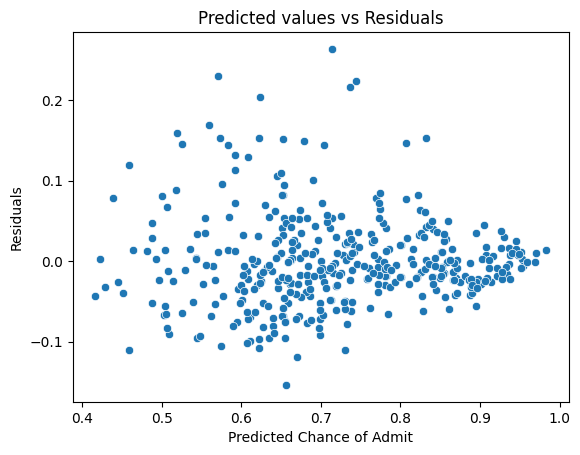

In [723]:
#Linearity of variables (no pattern in the residual plot)

sns.scatterplot(x=Y_hat,y=errors)
plt.xlabel("Predicted Chance of Admit")
plt.ylabel("Residuals")

plt.title("Predicted values vs Residuals")
plt.show()

# Residuals vs Predicted:

As can be seen in the scatter plot for Residuals vs Predicted values, there is no specific pattern between chance of admit and the error distribution.

In [730]:
#Test for Homoscedasticity
# Performing the Goldfeld-Quandt test to check for Homoscedasticity -
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_train, X2_sm)
print(lzip(name, test))
print(name[0], np.round(test[0], 2))
print(name[1], np.round(test[1], 2))

[('F statistic', 1.128081027695172), ('p-value', 0.20347575937191165)]
F statistic 1.13
p-value 0.2


# Test for Homoscedasticity: Goldfeld-quandt test:

F Statistic comes out to be 1.13 => Implying minimal difference in variance between groups

p-value of 0.2 indicates that this difference is statistically significant at conventional levels of significance (e.g., 0.05).

Therefore, we accept the null hypothesis of homoscedasticity, and conclude that there is no strong evidence of heteroscedasticity in the data.

In [710]:
#Normality of residuals (almost bell-shaped curve in residuals distribution, points in QQ plot are almost all on the line)

Text(0.5, 1.0, 'Histogram of residuals')

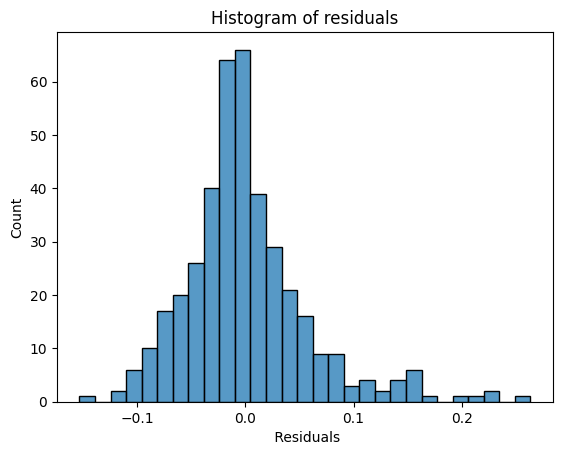

In [721]:
# Residuals distribution
import seaborn as sns

sns.histplot(errors)
plt.xlabel(" Residuals")
plt.title("Histogram of residuals")

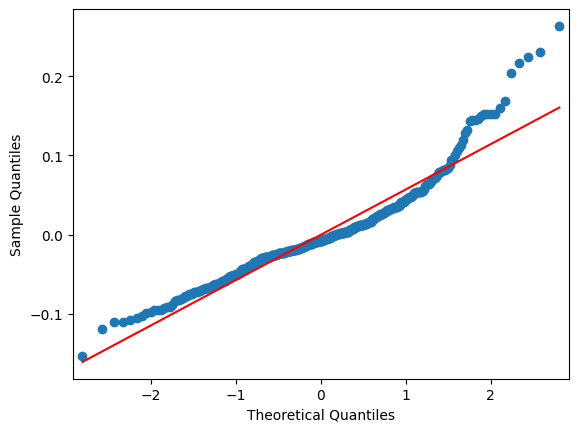

In [737]:
#QQ plot to check the normality of errors distribution
import statsmodels.api as sm
import pylab as py
sm.qqplot(errors, line ='s')
py.show()

In [746]:
# Performing the Shapiro Wilk test  to check for normality -
from scipy import stats
res = stats.shapiro(errors)
np.round(res.statistic, 2)

0.93

# Shapiro-Wilk Test for Normality:

A high value of 0.93 indicates normal distribution of errors.

# Insights from EDA:

1) **Strong Correlations**: The strong correlations between CGPA, GRE Score, and TOEFL Score suggest that academic performance and proficiency in English are closely related to each other. High GRE & TOEFL scores for high CGPA students might indicate that students who perform well academically tend to also score higher on standardized tests.

2) **Dimensionality Reduction with PCA** (5 components): PCA reducing the dataset to 5 components while retaining a significant portion of the variance suggests that despite the presence of multiple features, the underlying data structure can be effectively captured with fewer dimensions. This might point to redundancy among the original features.

3) **Feature Selection**  (7 features): The identification of 7 key features through feature selection indicates specific areas that are most predictive of the target variable (e.g., 'Chance of Admit'). These features are directly relevant and potentially more interpretable than PCA components.

4) **Linear and Polynomial (Degree=1) Regression** have essentially the same performance, which is expected since Polynomial Regression with degree=1 is equivalent to Linear Regression. Both models have the highest R-squared score among the evaluated models, indicating a strong ability to predict the 'Chance of Admit' from the given features.

5) **Ridge Regression also performs similarly to Linear Regression in this case**, with a slight difference in R-squared score and RMSE. This similarity suggests that the regularization introduced by Ridge does not significantly alter the predictions for this particular dataset, possibly because multicollinearity is not a severe issue or the optimal alpha value is close to the one chosen.

6) **Lasso Regression shows a notably lower R-squared score compared to the other models**, which indicates that the level of regularization (controlled by alpha=0.1) might be too strong, leading to the suppression of some relevant features' effects. Adjusting the alpha parameter could improve its performance.

#Distributions:

1) The distributions of GRE Score, TOEFL Score, and CGPA are fairly normal but **slightly left-skewed, indicating most Jamboree students have above-average scores**.

2) The Chance of Admit distribution is also **somewhat left-skewed, suggesting that most Jamboree students have a higher likelihood of admission**.


# Recommendations:

1) **Model Selection**: Given the results, Linear Regression or Ridge Regression would be recommended for predicting the 'Chance of Admit' based on the provided features due to their superior performance in terms of R-squared score and RMSE.

2) **Tuning Lasso Regression further**: For Lasso Regression, one shall consider experimenting with different values of alpha using techniques such as cross-validation to find an optimal balance that maximizes R-squared score without excessively increasing RMSE.

3) **Further Investigation:** It may be beneficial to further investigate feature engineering, selection, and other preprocessing steps to see if the model's performance can be improved.

4) **Focus on Key Features for Modeling**: When building predictive models, we prioritize the key features identified by 'feature selection'.

5) **Further Investigate Correlations:** We can further explore the relationships between CGPA, GRE Score, and TOEFL Score. Understanding how these features interact could provide deeper insights into student performance and guide more targeted data collection or feature engineering efforts.

6) **Cross-Validation:** We can also use cross-validation techniques to assess the robustness of the models. This helps to ensure that our findings and model performance are reliable and not just the result of overfitting to the training data.

7) **Domain Expertise and Further Data Collection:** We can consult with domain experts (e.g., education professionals) to interpret the findings meaningfully and identify any potential biases or confounding factors. We should also consider collecting additional data that might help explain the relationships identified or improve model performance.

8) **Impactful Features for Policy and Interventions:** For educational institutions or policymakers, the identified key features can inform targeted interventions or policies. For example, improving students' English proficiency or offering preparatory courses for standardized tests could be beneficial strategies.